In [169]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model 
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler 
import numpy as np

In [147]:
df = pd.read_csv('Suicide_Final_Avg.csv')
df

,LocationTime,Suicide_Val_TOT,Alcohol_Val,Edu_Sec_Val,Edu_Try_Val,Emp_Val,Healthy_Spend_Val,Obesity_Val,Smoking_Val,Soc_Spend_Val,Work_Hour_Val
0,ARG-1990,9.3,9.5,52.0,31.3,0.0,25.8,0.0,0.0,0.0,1854.0
1,ARG-1991,8.2,8.4,53.6,30.8,0.0,26.1,61.8,13.4,0.0,1845.6
2,ARG-1992,9.0,8.2,61.8,33.0,86.7,25.5,59.4,12.1,2.0,1855.7
3,ARG-1993,9.3,7.5,59.4,33.7,87.2,24.6,45.8,11.3,1.9,1874.2
4,ARG-1994,8.7,10.0,45.8,36.1,87.5,24.3,52.3,10.8,1.9,1870.3
...,...,...,...,...,...,...,...,...,...,...,...
1326,ZAF-2014,1.2,7.2,59.5,12.8,81.7,29.2,64.0,26.0,12.1,1778.4
1327,ZAF-2015,1.0,7.2,59.4,13.0,81.3,29.0,71.0,26.0,12.2,1777.6
1328,ZAF-2016,0.8,7.3,58.2,13.8,79.5,29.1,65.7,0.0,12.5,1781.6
1329,ZAF-2017,0.7,7.3,55.9,15.5,78.7,28.9,66.2,0.0,12.6,1777.2


In [148]:
# Spliting target variable and independent variables
X = df.drop(['Suicide_Val_TOT', 'LocationTime'], axis = 1).values.reshape(-1, 9)
y = df['Suicide_Val_TOT']


In [149]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size = 0.3, random_state = 100)

In [150]:
# Create a StandardScaler instance
scaler = StandardScaler()
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [151]:
#Linear Regression
model= LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [152]:
X_train_scaled

array([[ 1.2596093 , -1.11926909,  0.91578594, ...,  0.87636401,
         1.67456418,  0.68661316],
       [ 0.29955057, -0.52090871,  1.53052074, ..., -0.60183311,
        -0.77876184,  0.18339778],
       [ 1.56930567,  0.58960757, -0.15999994, ..., -1.72046877,
        -0.31587014,  0.53493113],
       ...,
       [ 0.67118621, -1.02799378, -0.8070892 , ...,  0.55675383,
        -0.59360516,  0.31991161],
       [ 0.79506475, -0.50569616,  0.25251946, ..., -1.72046877,
        -0.26958097, -0.17428484],
       [-0.41275108, -0.20144512,  1.10991272, ...,  0.65663201,
        -0.15385804,  0.29223989]])

In [153]:
# Adding constant
X_train_scaled = sm.add_constant(X_train_scaled)

In [154]:
#Running model 
lm = sm.OLS(y_train,X_train_scaled).fit()

In [155]:
#Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicide_Val_TOT   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     33.82
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           1.13e-51
Time:                        18:24:21   Log-Likelihood:                -3177.9
No. Observations:                 931   AIC:                             6376.
Df Residuals:                     921   BIC:                             6424.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9855      0.242     57.757      0.0

In [156]:
y_pred = model.predict(X_test_scaled) 
y_pred

array([14.7286577 , 22.49449033, 13.90674188,  5.30272518,  6.24407951,
       18.25369834, 16.6668898 , 18.43048871, 11.05407731, 15.57471256,
       19.35851004, 15.11033667, 11.63098516, 14.79304202, 22.01510305,
        9.05301452, 18.13959763, 17.70453603,  9.72020211, 12.71346745,
       12.64675389, 11.14457097, 18.48705426, 15.66577483, 19.39420752,
       15.59124851, 19.28569717,  8.8032566 , 19.44789161, 14.82998992,
       23.5089368 , 13.5800568 , 17.84903525, 11.84816755, 11.29115161,
       14.28883534, 13.35015379, 16.15267847, 14.94829126,  2.99188072,
       15.0249121 , 18.17466875, 16.07127818, 12.31413142, 20.86003227,
        5.07188198,  9.26840557, 18.918068  , 18.28438074,  5.76544994,
       11.26474281, 11.39617417, 14.053244  ,  4.498477  , 19.49187293,
       15.27269735, 16.04259993, 14.5305072 , 11.07628889, 14.04740516,
       14.63909595, 13.6587443 , 19.18719781, 13.36975764, 12.30053343,
       13.5935911 ,  9.42113245,  0.14853525, 18.49409083,  4.66

In [157]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.20245997233060076

In [158]:
pred_y_df=pd.DataFrame({"Actual Value":y_test, "Predicted Value":y_pred, "Difference":y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
560,7.0,14.728658,-7.728658
1208,31.0,22.494490,8.505510
222,19.7,13.906742,5.793258
315,8.7,5.302725,3.397275
731,7.3,6.244080,1.055920
888,10.5,18.253698,-7.753698
139,11.0,16.666890,-5.666890
459,39.4,18.430489,20.969511
256,11.9,11.054077,0.845923
238,11.1,15.574713,-4.474713


Text(0, 0.5, 'Predicted')

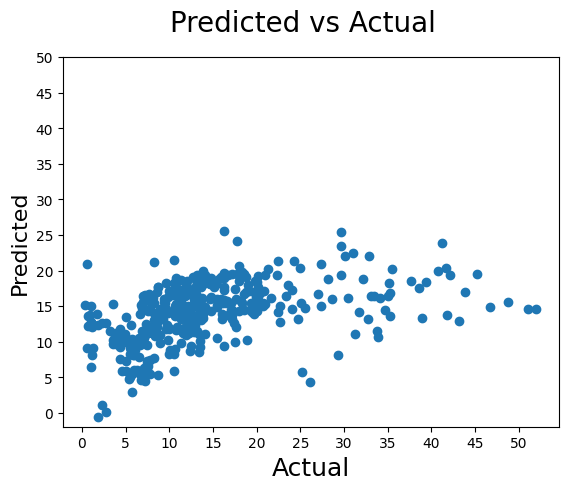

In [174]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred) 
plt.yticks(np.arange(0, 51, step=5)) 
plt.xticks(np.arange(0,51, step=5))
fig.suptitle('Predicted vs Actual', fontsize=20)              
plt.xlabel('Actual', fontsize=18)                          
plt.ylabel('Predicted', fontsize=16)                          